<a href="https://colab.research.google.com/github/jamg-upv/CAHOS19/blob/main/python/modeloOBJETIVO_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd 
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import tensorflow as tf


direccion0='https://raw.githubusercontent.com/jamg-upv/CAHOS19/main/inputtables/dataset1fake1.csv'
df0=pd.read_csv(direccion0, delimiter=';',decimal=',')

df0

,Id,edad,sexo,CNH,fechaingrehosp,fechaingreuci,fechaaltauci,fechaaltahosp,fechadefunc,fechatraslado,altadeftraslado,ComorbidityIndex
0,574,25,0,120115,2020-09-02,2020-09-08,2020-09-08,2020-09-08,NaN,NaN,a,0.979716
1,1443,75,0,120115,2020-09-02,2020-09-18,2020-09-18,2020-09-18,2020-09-18,NaN,d,12.197310
2,2210,75,0,120115,2020-09-02,2020-09-09,2020-10-01,2020-10-01,NaN,NaN,a,16.128674
3,2986,45,0,120115,2020-09-02,2020-09-07,2020-09-07,2020-09-07,NaN,NaN,a,1.893606
4,3271,55,0,120115,2020-09-02,2020-09-10,2020-09-10,2020-09-10,NaN,NaN,a,3.380968
...,...,...,...,...,...,...,...,...,...,...,...,...
13776,6041,85,1,30211,2021-03-25,2021-04-01,2021-04-17,2021-04-17,2021-04-17,NaN,d,34.204174
13777,6374,85,0,30211,2021-03-25,2021-03-31,2021-04-21,2021-04-21,NaN,NaN,a,36.384220
13778,7765,45,1,460044,2021-03-25,2021-04-01,2021-04-01,2021-04-01,NaN,NaN,a,3.446364
13779,9872,55,1,460044,2021-03-25,2021-03-30,2021-04-10,2021-04-16,NaN,NaN,a,8.273426


In [5]:
#Sexo no puede ser categoria, lo separamos en dos columnas (hombre y mujer) 
#con valor 0, 1 - false, true respectivamente
sexo = df0.pop('sexo')
df0['Hombre'] = (sexo == 0)*1.0
df0['Mujer'] = (sexo == 1)*1.0

#Preparamos datos de fechas
df0['fechaingrehosp'] = pd.to_datetime(df0['fechaingrehosp'], format='%Y-%m-%d')
df0['fechaaltahosp'] = pd.to_datetime(df0['fechaaltahosp'], format='%Y-%m-%d')
ingreso = df0.pop('fechaingrehosp')
salida = df0.pop('fechaaltahosp')
df0['diasencama'] = (salida - ingreso).dt.days

#Quitamos las columnas que no nos sirven
df01 = df0.drop(columns=['Id','CNH','fechaingreuci','fechaaltauci',
                       'fechadefunc','fechatraslado','altadeftraslado'])
df01

,edad,ComorbidityIndex,Hombre,Mujer,diasencama
0,25,0.979716,1.0,0.0,6
1,75,12.197310,1.0,0.0,16
2,75,16.128674,1.0,0.0,29
3,45,1.893606,1.0,0.0,5
4,55,3.380968,1.0,0.0,8
...,...,...,...,...,...
13776,85,34.204174,0.0,1.0,23
13777,85,36.384220,1.0,0.0,27
13778,45,3.446364,0.0,1.0,7
13779,55,8.273426,0.0,1.0,22


In [6]:
#Se guarda el csv manualmente en el repositorio de github en 'outputtables'
df01.to_csv('DataFrame.csv')

In [8]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

direccion0='https://raw.githubusercontent.com/jamg-upv/CAHOS19/main/outputtables/DataFrame.csv'
df=pd.read_csv(direccion0, delimiter=',')
df.head(10)

,Unnamed: 0,edad,ComorbidityIndex,Hombre,Mujer,diasencama
0,0,25,0.979715,1.0,0.0,6
1,1,75,12.197310,1.0,0.0,16
2,2,75,16.128674,1.0,0.0,29
3,3,45,1.893606,1.0,0.0,5
4,4,55,3.380968,1.0,0.0,8
5,5,55,2.841149,1.0,0.0,12
6,6,55,4.545839,1.0,0.0,9
7,7,85,22.364268,1.0,0.0,23
8,8,75,12.396194,0.0,1.0,15
9,9,55,2.841149,1.0,0.0,10


In [9]:
df2 = df.drop(range(13781,13781), axis=0)
df2

,Unnamed: 0,edad,ComorbidityIndex,Hombre,Mujer,diasencama
0,0,25,0.979715,1.0,0.0,6
1,1,75,12.197310,1.0,0.0,16
2,2,75,16.128674,1.0,0.0,29
3,3,45,1.893606,1.0,0.0,5
4,4,55,3.380968,1.0,0.0,8
...,...,...,...,...,...,...
13776,13776,85,34.204174,0.0,1.0,23
13777,13777,85,36.384220,1.0,0.0,27
13778,13778,45,3.446364,0.0,1.0,7
13779,13779,55,8.273426,0.0,1.0,22


In [ ]:
#Hacemos array
datos_entrada = np.array(df2[['edad','ComorbidityIndex', 
                              'Hombre', 'Mujer']], dtype=float)
dias_cama = np.array(df2['diasencama'], dtype=float)
print(datos_entrada)

In [ ]:
#Con capas ocultas
oculta1 = tf.keras.layers.Dense(units=4, input_shape=[4])
oculta2 = tf.keras.layers.Dense(units=5)
oculta3 = tf.keras.layers.Dense(units=2)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, oculta3, salida])

In [ ]:
#Compilamos modelo
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.5),
    loss='mean_squared_error'
)

In [ ]:
print('Hola, comenzamos en 3,2,1...')
historial = modelo.fit(datos_entrada, dias_cama, epochs=1000, verbose=False)
print('Esta ready')

Hola, comenzamos en 3,2,1...
Esta ready


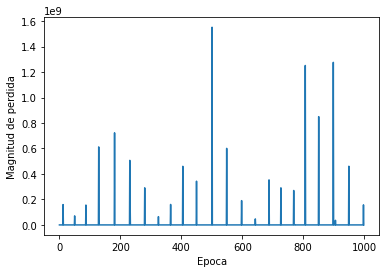

In [ ]:
plt.xlabel('Epoca')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])

In [ ]:
print('Hacemos una predicción')
resultado = modelo.predict([[65.0,4.4,1.0,0.0]])
print('El resultado es' + str(resultado) + 'en cama')

Hacemos una predicción
El resultado es[[13.649256]]en cama


In [ ]:
paciente1 = [25.0,0.97,1.0,0.0]
paciente2 = [75.0,12.19,1.0,0.0]
paciente3 = [75.0,16.12,1.0,0.0]
paciente4 = [45.0, 1.89,1.0,0.0]
paciente5 = [55.0,3.38,1.0,0.0]
paciente6 = [75.0,12.39,0.0,1.0]
paciente7 = [65.0,9.69,0.0,1.0]
paciente8 = [65.0,8.01,0.0,1.0]
paciente9 = [75.0,13.39,0.0,1.0]
paciente10 = [85.0,40.7,0.0,1.0]

In [ ]:
print('Hacemos una predicción')
resultado = modelo.predict([paciente1, paciente2, paciente3, paciente4, paciente5, paciente6, paciente7, paciente8, paciente9, paciente10])
print('El resultado es' + str(resultado) + 'en cama')

Hacemos una predicción
El resultado es[[-71.7434  ]
 [ 19.06495 ]
 [ 15.375778]
 [-32.058975]
 [-13.191799]
 [ 32.87774 ]
 [ 15.150934]
 [ 16.72753 ]
 [ 31.93396 ]
 [ 26.54299 ]]en cama


In [ ]:
ocupacion_camas=pd.DataFrame(resultado)

In [ ]:
ocupacion_camas

,0
0,7.955434
1,15.354627
2,15.899896
3,10.420067
4,11.795292
5,23.649464
6,22.106356
7,21.873264
8,23.788208
9,28.745838


In [ ]:
dias = ['dia 1', 'dia 2', 'dia 3', 'dia 4', 'dia 5', 'dia 6', 'dia 7', 'dia 8', 'dia 9', 'dia 10', 'dia 11', 'dia 12', 'dia 13', 'dia 14']
ocupacion_por_dia = pd.DataFrame(columns=dias)

In [ ]:
row = []
data = []
for count  in range(0, len(resultado)):
    for dia in range(0, len(dias)):
      if (dia+1 <= int(resultado[count])):
        row.append(1)
      else:
        row.append(0) 
    print(row)
    data.append(row)
    row = []
print(data)
a = np.sum(data,axis=0)
a

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


array([10, 10, 10, 10, 10, 10, 10,  9,  9,  9,  8,  7,  7,  7])

In [ ]:
ocupacion_por_dia.loc[0]=a

In [ ]:
ocupacion_por_dia

,dia 1,dia 2,dia 3,dia 4,dia 5,dia 6,dia 7,dia 8,dia 9,dia 10,dia 11,dia 12,dia 13,dia 14
0,10,10,10,10,10,10,10,9,9,9,8,7,7,7
